# Практическая работа №3: Исследование задач о раскрасках

Выполнила студентка гр. 1304 Чернякова Валерия. Вариант №51.

## Цель работы

Формирование представления о задачах о раскрасках, выработать умение использование леммы Бёрнсайда для решения задачи о раскрасках, привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

## Основные теоретические положения
### Действие группы на множество. Определение.
Пусть $G$ - группа с нейтральным элементом $e$, a $X$ - некоторое множество. Будем говорить, что $G$ действует на $X$, если задана операция $G \times X \rightarrow G$.<br>
Для любого $x \in X$ и $g, h \in G$ операция обладает следующими свойствами:  
<ul>
    <li>$ex = x$ </li>
    <li>$g(hx) = g(h(x))$</li>
</ul>

### Орбита. Определение.
Орбитой элемента $x \in X$ под действием $G$ называется множество $Gx = \{gx : g \in G\}$.<br>
Длина орбиты - количество элементов в ней. Обозначается $\#G$.<br>
### Неподвижные точки. Определение.
Неподвижными точками элемента $g \in G$ называются те $x \in X$, для которых $gx = x$. Множество неподвижных точек элемента $g$ обозначается как $X^g$.<br>
### Лемма Бёрнсайда.
Количество орбит действия группы $G$ на множестве $X$ равно:<br>
$N = \frac{1}{\#G}\sum_{g \in G}\#X^{g}$<br>
### Множество раскрасок. Определение.
Пусть $I$ - произвольное множество, а $C$ - множество цветов. Раскраской множества $I$ называется функция из $I$ в $C$. Множество всех раскрасок обозначается через $C^I$. Количество раскрасок равно $(\#C)^{\#I}$.<br>
### Количество раскрасок. Определение.
Количество раскрасок из $C^I$, которые сохраняют данный элемент $g \in G$, равно $(\#C)^{c(\varphi(g))}$.<br>
Здесь $c(\varphi(g))$ обозначает количество независимых циклов перестановки $\varphi(g)$.

## Постановка задачи

Аналитически решить задачу о раскрасках; графически отобразить решения задачи с использованием системы компьютерной алгебры SageMath. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы

### Условие задачи
Каждая сторона квадрата разбита на 11 равных частей и через точки деления проведены отрезки, параллельные сторонам квадрата. В получившиеся клеточки вставляют цветные стёкла 3 различных цветов. Сколькими способами можно составить такую мозаику (с точностью до поворотов и осевых симметрий квадрата)?

### Аналитическое решение задачи о раскрасках 
После деления сторон квадрата на 11 частей и проведения через них линий, параллельных сторонам квадрата, имеем мозаику размером $11\times11$, каждый элемент которой окрашен в один из трёх цветов.<br>
Занумеруем места для кусочков мозаики числами от $1$ до $121$. Получаем последовательность $X = \{x_1, x_2, x_3,...,x_{121}\}$, где $x_i \in \{a, b, c\}$, где $\{a, b, c\}$ - множество цветов.<br> 
Всего существует $3^{121}$ способов составить такую мозаику, однако при рассчёте данного числа не учитываются повороты и осевые симметрии квадрата. То есть не все раскраски будут соотвествовать различным мозаикам.

Реализуем функции, благодаря которым рассуждения приводимые в ходе аналитического решения будут достаточно обоснованы и содержательно интерпретированы.

_colors_count, parts_count_ - начальные значения, а именно количество цветов, которые используются для окраски клеточек мозаики, и количество частей, на которые делится квадрат, или же тоже самое, что и размер квадратной матрицы.

In [1]:
colors_count = 3
parts_count = 11

_create_matrix_ - функция, создающая матрицу размером $11\times11$, где каждый квадратик пронумерован числом от $1$ до $121$.

In [2]:
def create_matrix():
    matrix = []
    count = 1
    for i in range(parts_count):
        current_row = []
        for j in range(1, parts_count + 1):
            current_row.append(count)
            count += 1
        matrix.append(current_row)
    return matrix

_print_matrix_ - функция, печатающая матрицу для ее удобного отображения в стиле Markdown.

In [3]:
def print_matrix(matrix):
    print('begin{pmatrix}')
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            print(matrix[i][j], end = ' ')
            if (j != len(matrix[i])-1):
                print('&', end =' ')
        print()
    print('end{pmatrix}')

_rotate_matrix_ - функция, осуществляющая поворот матрицы на заданный угол. Вращение для углов $180^{\circ}, 270^{\circ}, 360^{\circ}$ представлено как несколько поворотов на $90^{\circ}$.

In [4]:
def rotate_matrix(matrix, degree):
    rotate_matrix = matrix
    while degree != 0:
        rotate_matrix = [list(reversed(column)) for column in zip(*rotate_matrix)]
        degree -= 90
    return rotate_matrix

_reflection_matrix_ - функция, предназначенная для отражения матрицы относительно заданной оси: вертикальной, горизонтальной, главной или побочной диагонали. Отражение относительно заданной оси - это поворот матрицы на один из углов $180^{\circ}, 270^{\circ}, 360^{\circ}$ с дальнейшим расположением значений в строках в обратном порядке в получившихся матрицах.

In [5]:
def reflection_matrix(matrix, asix): 
    reflex_matrix = matrix
    if asix == "main_diagonal":
        reflex_matrix = rotate_matrix(reflex_matrix, 90)
    if asix == "horizontal":
        reflex_matrix = rotate_matrix(reflex_matrix, 180)          
    if asix == "side_diagonal":
        reflex_matrix = rotate_matrix(reflex_matrix, 270)  
    for i in range(len(matrix)):
        reflex_matrix[i] = reflex_matrix[i][::-1]
    return reflex_matrix

 _create_permutation_ - функция, которая отображает перестановки, которые произошли в матрице после поворота. Показывает, как изменились значения.

In [6]:
def create_permutation(matrix, change_matrix):
    permutation = []
    # Количество элементов в матрице
    n = parts_count^2
    # Все значения от 1 до 121 в матрице
    values = [i for i in range(1, n+1)]
    permutation += [values]
    # Список для хранения измененных значений
    permutation += [[0]*n]
    values_changes = []
    for i in range(0, parts_count):
        for j in range(0, parts_count):
            # Все значения по порядку в новой матрице
            values_changes += [change_matrix[i][j]]
    # В списке всех новых значений матрицы по индексу хранится значение, 
    # какое теперь значение равное индексу увеличенному на единицу
    for i in range(len(values_changes)):
        permutation[1][i] = values_changes.index(i+1)+1
    return permutation

_find_cycle_ - функция, находящая все независимые циклы в перестановке и их количество.

In [7]:
def find_cycle(permutation_all):
    permutation = permutation_all[1]
    cycle_in_permutaion = []
    viewed = set()
    for i in range(len(permutation)):
        current_cycle = []
        if i+1 not in viewed:
            current_cycle = [i+1]
            viewed.add(i+1)
            j = permutation[i]
            while j != i+1:
                current_cycle.append(j)
                viewed.add(j)
                j = permutation[j-1]
            cycle_in_permutaion.append(current_cycle)
    # Для отформатированного вывода в стиле Markdown 
    cycle = str(cycle_in_permutaion)
    cycle = cycle[1:len(cycle)-1]
    cycle = cycle.replace("[", "(")
    cycle = cycle.replace("],", ")")
    cycle = cycle.replace("]", ")")
    return cycle, len(cycle_in_permutaion)

1) Рассмотрим изначальную матрицу.

In [8]:
matrix = create_matrix()
# print_matrix(matrix)

\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11\\
12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22\\
23 & 24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33\\
34 & 35 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44\\
45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55\\
56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66\\
67 & 68 & 69 & 70 & 71 & 72 & 73 & 74 & 75 & 76 & 77\\
78 & 79 & 80 & 81 & 82 & 83 & 84 & 85 & 86 & 87 & 88\\
89 & 90 & 91 & 92 & 93 & 94 & 95 & 96 & 97 & 98 & 99\\
100 & 101 & 102 & 103 & 104 & 105 & 106 & 107 & 108 & 109 & 110\\
111 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 119 & 120 & 121\\
\end{pmatrix}

2) Рассмотрим всевозможные повороты квадратной матрицы.<br>
Пусть $\tau$ - поворот матрицы на $90^{\circ}$. Тогда все имеющиеся повороты следующие:
<ul>
    <li>Поворот на $90^{\circ}$ - $\tau$;</li>
    <li>Поворот на $180^{\circ}$ - $\tau^2$;</li>
    <li>Поворот на $270^{\circ}$ - $\tau^3$;</li>
    <li>Поворот на $360^{\circ}$ - $\tau^4 = e$, тождественное преобразование.</li>
    </ul>
Теперь для каждого такого поворота отобразим получившиеся матрицы и найдем количество циклов, после перестановки элементов.

**Поворот на $90^{\circ}$ - $\tau$.**<br>
Матрица после поворота выглядит следующим образом.

In [9]:
matrix_90 = rotate_matrix(matrix, 90)
# print_matrix(matrix_90)

\begin{pmatrix}
111 & 100 & 89 & 78 & 67 & 56 & 45 & 34 & 23 & 12 & 1\\
112 & 101 & 90 & 79 & 68 & 57 & 46 & 35 & 24 & 13 & 2\\
113 & 102 & 91 & 80 & 69 & 58 & 47 & 36 & 25 & 14 & 3\\
114 & 103 & 92 & 81 & 70 & 59 & 48 & 37 & 26 & 15 & 4\\
115 & 104 & 93 & 82 & 71 & 60 & 49 & 38 & 27 & 16 & 5\\
116 & 105 & 94 & 83 & 72 & 61 & 50 & 39 & 28 & 17 & 6\\
117 & 106 & 95 & 84 & 73 & 62 & 51 & 40 & 29 & 18 & 7\\
118 & 107 & 96 & 85 & 74 & 63 & 52 & 41 & 30 & 19 & 8\\
119 & 108 & 97 & 86 & 75 & 64 & 53 & 42 & 31 & 20 & 9\\
120 & 109 & 98 & 87 & 76 & 65 & 54 & 43 & 32 & 21 & 10\\
121 & 110 & 99 & 88 & 77 & 66 & 55 & 44 & 33 & 22 & 11\\
\end{pmatrix}

Теперь запишем все перестановки.

In [10]:
permutation_90 = create_permutation(matrix, matrix_90)
# print_matrix(permutation_90)

\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55 & 56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66 & 67 & 68 & 69 & 70 & 71 & 72 & 73 & 74 & 75 & 76 & 77 & 78 & 79 & 80 & 81 & 82 & 83 & 84 & 85 & 86 & 87 & 88 & 89 & 90 & 91 & 92 & 93 & 94 & 95 & 96 & 97 & 98 & 99 & 100 & 101 & 102 & 103 & 104 & 105 & 106 & 107 & 108 & 109 & 110 & 111 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 119 & 120 & 121\\
11 & 22 & 33 & 44 & 55 & 66 & 77 & 88 & 99 & 110 & 121 & 10 & 21 & 32 & 43 & 54 & 65 & 76 & 87 & 98 & 109 & 120 & 9 & 20 & 31 & 42 & 53 & 64 & 75 & 86 & 97 & 108 & 119 & 8 & 19 & 30 & 41 & 52 & 63 & 74 & 85 & 96 & 107 & 118 & 7 & 18 & 29 & 40 & 51 & 62 & 73 & 84 & 95 & 106 & 117 & 6 & 17 & 28 & 39 & 50 & 61 & 72 & 83 & 94 & 105 & 116 & 5 & 16 & 27 & 38 & 49 & 60 & 71 & 82 & 93 & 104 & 115 & 4 & 15 & 26 & 37 & 48 & 59 & 70 & 81 & 92 & 103 & 114 & 3 & 14 & 25 & 36 & 47 & 58 & 69 & 80 & 91 & 102 & 113 & 2 & 13 & 24 & 35 & 46 & 57 & 68 & 79 & 90 & 101 & 112 & 1 & 12 & 23 & 34 & 45 & 56 & 67 & 78 & 89 & 100 & 111 
\end{pmatrix}

Найдем независимые циклы.

In [11]:
cycle_90, len_90 = find_cycle(permutation_90)
# print(cycle_90)
# print(len_90)

$\tau = (1, 11, 121, 111) (2, 22, 120, 100) (3, 33, 119, 89) (4, 44, 118, 78) (5, 55, 117, 67) (6, 66, 116, 56) (7, 77, 115, 45) (8, 88, 114, 34) (9, 99, 113, 23) (10, 110, 112, 12) (13, 21, 109, 101) (14, 32, 108, 90) (15, 43, 107, 79) (16, 54, 106, 68) (17, 65, 105, 57) (18, 76, 104, 46) (19, 87, 103, 35) (20, 98, 102, 24) (25, 31, 97, 91) (26, 42, 96, 80) (27, 53, 95, 69) (28, 64, 94, 58) (29, 75, 93, 47) (30, 86, 92, 36) (37, 41, 85, 81) (38, 52, 84, 70) (39, 63, 83, 59) (40, 74, 82, 48) (49, 51, 73, 71) (50, 62, 72, 60) (61)$<br>
Количество циклов: $31$.

**Поворот на $180^{\circ}$ - $\tau^2$.**<br>
Матрица после поворота выглядит следующим образом.

In [12]:
matrix_180 = rotate_matrix(matrix, 180)
# print_matrix(matrix_180)

\begin{pmatrix}
121 & 120 & 119 & 118 & 117 & 116 & 115 & 114 & 113 & 112 & 111\\
110 & 109 & 108 & 107 & 106 & 105 & 104 & 103 & 102 & 101 & 100\\
99 & 98 & 97 & 96 & 95 & 94 & 93 & 92 & 91 & 90 & 89\\
88 & 87 & 86 & 85 & 84 & 83 & 82 & 81 & 80 & 79 & 78\\
77 & 76 & 75 & 74 & 73 & 72 & 71 & 70 & 69 & 68 & 67\\
66 & 65 & 64 & 63 & 62 & 61 & 60 & 59 & 58 & 57 & 56\\
55 & 54 & 53 & 52 & 51 & 50 & 49 & 48 & 47 & 46 & 45\\
44 & 43 & 42 & 41 & 40 & 39 & 38 & 37 & 36 & 35 & 34\\
33 & 32 & 31 & 30 & 29 & 28 & 27 & 26 & 25 & 24 & 23\\
22 & 21 & 20 & 19 & 18 & 17 & 16 & 15 & 14 & 13 & 12\\
11 & 10 & 9 & 8 & 7 & 6 & 5 & 4 & 3 & 2 & 1\\
\end{pmatrix}

Теперь запишем все перестановки.

In [13]:
permutation_180 = create_permutation(matrix, matrix_180)
# print_matrix(permutation_180)

\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55 & 56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66 & 67 & 68 & 69 & 70 & 71 & 72 & 73 & 74 & 75 & 76 & 77 & 78 & 79 & 80 & 81 & 82 & 83 & 84 & 85 & 86 & 87 & 88 & 89 & 90 & 91 & 92 & 93 & 94 & 95 & 96 & 97 & 98 & 99 & 100 & 101 & 102 & 103 & 104 & 105 & 106 & 107 & 108 & 109 & 110 & 111 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 119 & 120 & 121\\
121 & 120 & 119 & 118 & 117 & 116 & 115 & 114 & 113 & 112 & 111 & 110 & 109 & 108 & 107 & 106 & 105 & 104 & 103 & 102 & 101 & 100 & 99 & 98 & 97 & 96 & 95 & 94 & 93 & 92 & 91 & 90 & 89 & 88 & 87 & 86 & 85 & 84 & 83 & 82 & 81 & 80 & 79 & 78 & 77 & 76 & 75 & 74 & 73 & 72 & 71 & 70 & 69 & 68 & 67 & 66 & 65 & 64 & 63 & 62 & 61 & 60 & 59 & 58 & 57 & 56 & 55 & 54 & 53 & 52 & 51 & 50 & 49 & 48 & 47 & 46 & 45 & 44 & 43 & 42 & 41 & 40 & 39 & 38 & 37 & 36 & 35 & 34 & 33 & 32 & 31 & 30 & 29 & 28 & 27 & 26 & 25 & 24 & 23 & 22 & 21 & 20 & 19 & 18 & 17 & 16 & 15 & 14 & 13 & 12 & 11 & 10 & 9 & 8 & 7 & 6 & 5 & 4 & 3 & 2 & 1 
\end{pmatrix}

Найдем независимые циклы.

In [14]:
cycle_180, len_180 = find_cycle(permutation_180)
# print(cycle_180)
# print(len_180)

$\tau^2 = (1, 121) (2, 120) (3, 119) (4, 118) (5, 117) (6, 116) (7, 115) (8, 114) (9, 113) (10, 112) (11, 111) (12, 110) (13, 109) (14, 108) (15, 107) (16, 106) (17, 105) (18, 104) (19, 103) (20, 102) (21, 101) (22, 100) (23, 99) (24, 98) (25, 97) (26, 96) (27, 95) (28, 94) (29, 93) (30, 92) (31, 91) (32, 90) (33, 89) (34, 88) (35, 87) (36, 86) (37, 85) (38, 84) (39, 83) (40, 82) (41, 81) (42, 80) (43, 79) (44, 78) (45, 77) (46, 76) (47, 75) (48, 74) (49, 73) (50, 72) (51, 71) (52, 70) (53, 69) (54, 68) (55, 67) (56, 66) (57, 65) (58, 64) (59, 63) (60, 62) (61)$<br>
Количество циклов: $61$.

**Поворот на $270^{\circ}$ - $\tau^3$.**<br>
Матрица после поворота выглядит следующим образом.

In [15]:
matrix_270 = rotate_matrix(matrix, 270)
# print_matrix(matrix_270)

\begin{pmatrix}
11 & 22 & 33 & 44 & 55 & 66 & 77 & 88 & 99 & 110 & 121\\
10 & 21 & 32 & 43 & 54 & 65 & 76 & 87 & 98 & 109 & 120\\
9 & 20 & 31 & 42 & 53 & 64 & 75 & 86 & 97 & 108 & 119\\
8 & 19 & 30 & 41 & 52 & 63 & 74 & 85 & 96 & 107 & 118\\
7 & 18 & 29 & 40 & 51 & 62 & 73 & 84 & 95 & 106 & 117\\
6 & 17 & 28 & 39 & 50 & 61 & 72 & 83 & 94 & 105 & 116\\
5 & 16 & 27 & 38 & 49 & 60 & 71 & 82 & 93 & 104 & 115\\
4 & 15 & 26 & 37 & 48 & 59 & 70 & 81 & 92 & 103 & 114\\
3 & 14 & 25 & 36 & 47 & 58 & 69 & 80 & 91 & 102 & 113\\
2 & 13 & 24 & 35 & 46 & 57 & 68 & 79 & 90 & 101 & 112\\
1 & 12 & 23 & 34 & 45 & 56 & 67 & 78 & 89 & 100 & 111\\
\end{pmatrix}

Теперь запишем все перестановки.

In [16]:
permutation_270 = create_permutation(matrix, matrix_270)
# print_matrix(permutation_270)

\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55 & 56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66 & 67 & 68 & 69 & 70 & 71 & 72 & 73 & 74 & 75 & 76 & 77 & 78 & 79 & 80 & 81 & 82 & 83 & 84 & 85 & 86 & 87 & 88 & 89 & 90 & 91 & 92 & 93 & 94 & 95 & 96 & 97 & 98 & 99 & 100 & 101 & 102 & 103 & 104 & 105 & 106 & 107 & 108 & 109 & 110 & 111 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 119 & 120 & 121\\
111 & 100 & 89 & 78 & 67 & 56 & 45 & 34 & 23 & 12 & 1 & 112 & 101 & 90 & 79 & 68 & 57 & 46 & 35 & 24 & 13 & 2 & 113 & 102 & 91 & 80 & 69 & 58 & 47 & 36 & 25 & 14 & 3 & 114 & 103 & 92 & 81 & 70 & 59 & 48 & 37 & 26 & 15 & 4 & 115 & 104 & 93 & 82 & 71 & 60 & 49 & 38 & 27 & 16 & 5 & 116 & 105 & 94 & 83 & 72 & 61 & 50 & 39 & 28 & 17 & 6 & 117 & 106 & 95 & 84 & 73 & 62 & 51 & 40 & 29 & 18 & 7 & 118 & 107 & 96 & 85 & 74 & 63 & 52 & 41 & 30 & 19 & 8 & 119 & 108 & 97 & 86 & 75 & 64 & 53 & 42 & 31 & 20 & 9 & 120 & 109 & 98 & 87 & 76 & 65 & 54 & 43 & 32 & 21 & 10 & 121 & 110 & 99 & 88 & 77 & 66 & 55 & 44 & 33 & 22 & 11 
\end{pmatrix}

Найдем независимые циклы.

In [17]:
cycle_270, len_270 = find_cycle(permutation_270)
# print(cycle_270)
# print(len_270)

$\tau^3 = (1, 111, 121, 11) (2, 100, 120, 22) (3, 89, 119, 33) (4, 78, 118, 44) (5, 67, 117, 55) (6, 56, 116, 66) (7, 45, 115, 77) (8, 34, 114, 88) (9, 23, 113, 99) (10, 12, 112, 110) (13, 101, 109, 21) (14, 90, 108, 32) (15, 79, 107, 43) (16, 68, 106, 54) (17, 57, 105, 65) (18, 46, 104, 76) (19, 35, 103, 87) (20, 24, 102, 98) (25, 91, 97, 31) (26, 80, 96, 42) (27, 69, 95, 53) (28, 58, 94, 64) (29, 47, 93, 75) (30, 36, 92, 86) (37, 81, 85, 41) (38, 70, 84, 52) (39, 59, 83, 63) (40, 48, 82, 74) (49, 71, 73, 51) (50, 60, 72, 62) (61)$<br>
Количество циклов: $31$.

**Поворот на $360^{\circ}$ - $\tau^4 = e$.**<br>
Матрица после поворота выглядит следующим образом.

In [18]:
matrix_360 = rotate_matrix(matrix, 360)
# print_matrix(matrix_360)

\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11\\
12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22\\
23 & 24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33\\
34 & 35 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44\\
45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55\\
56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66\\
67 & 68 & 69 & 70 & 71 & 72 & 73 & 74 & 75 & 76 & 77\\
78 & 79 & 80 & 81 & 82 & 83 & 84 & 85 & 86 & 87 & 88\\
89 & 90 & 91 & 92 & 93 & 94 & 95 & 96 & 97 & 98 & 99\\
100 & 101 & 102 & 103 & 104 & 105 & 106 & 107 & 108 & 109 & 110\\
111 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 119 & 120 & 121\\
\end{pmatrix}

Теперь запишем все перестановки.

In [19]:
permutation_360 = create_permutation(matrix, matrix_360)
# print_matrix(permutation_360)

\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55 & 56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66 & 67 & 68 & 69 & 70 & 71 & 72 & 73 & 74 & 75 & 76 & 77 & 78 & 79 & 80 & 81 & 82 & 83 & 84 & 85 & 86 & 87 & 88 & 89 & 90 & 91 & 92 & 93 & 94 & 95 & 96 & 97 & 98 & 99 & 100 & 101 & 102 & 103 & 104 & 105 & 106 & 107 & 108 & 109 & 110 & 111 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 119 & 120 & 121\\
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55 & 56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66 & 67 & 68 & 69 & 70 & 71 & 72 & 73 & 74 & 75 & 76 & 77 & 78 & 79 & 80 & 81 & 82 & 83 & 84 & 85 & 86 & 87 & 88 & 89 & 90 & 91 & 92 & 93 & 94 & 95 & 96 & 97 & 98 & 99 & 100 & 101 & 102 & 103 & 104 & 105 & 106 & 107 & 108 & 109 & 110 & 111 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 119 & 120 & 121 
\end{pmatrix}

Найдем независимые циклы.

In [20]:
cycle_360, len_360 = find_cycle(permutation_360)
# print(cycle_360)
# print(len_360)

$\tau^4 = e = (1) (2) (3) (4) (5) (6) (7) (8) (9) (10) (11) (12) (13) (14) (15) (16) (17) (18) (19) (20) (21) (22) (23) (24) (25) (26) (27) (28) (29) (30) (31) (32) (33) (34) (35) (36) (37) (38) (39) (40) (41) (42) (43) (44) (45) (46) (47) (48) (49) (50) (51) (52) (53) (54) (55) (56) (57) (58) (59) (60) (61) (62) (63) (64) (65) (66) (67) (68) (69) (70) (71) (72) (73) (74) (75) (76) (77) (78) (79) (80) (81) (82) (83) (84) (85) (86) (87) (88) (89) (90) (91) (92) (93) (94) (95) (96) (97) (98) (99) (100) (101) (102) (103) (104) (105) (106) (107) (108) (109) (110) (111) (112) (113) (114) (115) (116) (117) (118) (119) (120) (121)$<br>
Количество циклов: $121$.

3) Теперь пусть $\sigma$ - вертикальная осевая симметрия. Тогда все имеющиеся симметрии будут следующие:
<ul>
    <li>Вертикальная симметрия - $\sigma$;</li>
    <li>Симметрия относительно главной диагонали - $\sigma(\tau)$;</li>
    <li>Горизонтальная симметрия - $\sigma(\tau^2)$;</li>
    <li>Симметрия относительно побочной диагонали - $\sigma(\tau^3)$.</li>
    </ul>
Теперь для каждой такой симметрии отобразим получившиеся матрицы и найдем количество циклов, после перестановки элементов.

**Вертикальная симметрия - $\sigma$.**<br>
Матрица после симметрии выглядит следующим образом.

In [21]:
matrix_vertical = reflection_matrix(matrix, 'vertical')
# print_matrix(matrix_vertical)

\begin{pmatrix}
11 & 10 & 9 & 8 & 7 & 6 & 5 & 4 & 3 & 2 & 1\\
22 & 21 & 20 & 19 & 18 & 17 & 16 & 15 & 14 & 13 & 12\\
33 & 32 & 31 & 30 & 29 & 28 & 27 & 26 & 25 & 24 & 23\\
44 & 43 & 42 & 41 & 40 & 39 & 38 & 37 & 36 & 35 & 34\\
55 & 54 & 53 & 52 & 51 & 50 & 49 & 48 & 47 & 46 & 45\\
66 & 65 & 64 & 63 & 62 & 61 & 60 & 59 & 58 & 57 & 56\\
77 & 76 & 75 & 74 & 73 & 72 & 71 & 70 & 69 & 68 & 67\\
88 & 87 & 86 & 85 & 84 & 83 & 82 & 81 & 80 & 79 & 78\\
99 & 98 & 97 & 96 & 95 & 94 & 93 & 92 & 91 & 90 & 89\\
110 & 109 & 108 & 107 & 106 & 105 & 104 & 103 & 102 & 101 & 100\\
121 & 120 & 119 & 118 & 117 & 116 & 115 & 114 & 113 & 112 & 111\\
\end{pmatrix}

Теперь запишем все перестановки.

In [22]:
permutation_vertical = create_permutation(matrix, matrix_vertical)
# print_matrix(permutation_vertical)

\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55 & 56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66 & 67 & 68 & 69 & 70 & 71 & 72 & 73 & 74 & 75 & 76 & 77 & 78 & 79 & 80 & 81 & 82 & 83 & 84 & 85 & 86 & 87 & 88 & 89 & 90 & 91 & 92 & 93 & 94 & 95 & 96 & 97 & 98 & 99 & 100 & 101 & 102 & 103 & 104 & 105 & 106 & 107 & 108 & 109 & 110 & 111 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 119 & 120 & 121\\
11 & 10 & 9 & 8 & 7 & 6 & 5 & 4 & 3 & 2 & 1 & 22 & 21 & 20 & 19 & 18 & 17 & 16 & 15 & 14 & 13 & 12 & 33 & 32 & 31 & 30 & 29 & 28 & 27 & 26 & 25 & 24 & 23 & 44 & 43 & 42 & 41 & 40 & 39 & 38 & 37 & 36 & 35 & 34 & 55 & 54 & 53 & 52 & 51 & 50 & 49 & 48 & 47 & 46 & 45 & 66 & 65 & 64 & 63 & 62 & 61 & 60 & 59 & 58 & 57 & 56 & 77 & 76 & 75 & 74 & 73 & 72 & 71 & 70 & 69 & 68 & 67 & 88 & 87 & 86 & 85 & 84 & 83 & 82 & 81 & 80 & 79 & 78 & 99 & 98 & 97 & 96 & 95 & 94 & 93 & 92 & 91 & 90 & 89 & 110 & 109 & 108 & 107 & 106 & 105 & 104 & 103 & 102 & 101 & 100 & 121 & 120 & 119 & 118 & 117 & 116 & 115 & 114 & 113 & 112 & 111 
\end{pmatrix}

Найдем независимые циклы.

In [23]:
cycle_vertical, len_vertical = find_cycle(permutation_vertical)
# print(cycle_vertical)
# print(len_vertical)

$\sigma = (1, 11) (2, 10) (3, 9) (4, 8) (5, 7) (6) (12, 22) (13, 21) (14, 20) (15, 19) (16, 18) (17) (23, 33) (24, 32) (25, 31) (26, 30) (27, 29) (28) (34, 44) (35, 43) (36, 42) (37, 41) (38, 40) (39) (45, 55) (46, 54) (47, 53) (48, 52) (49, 51) (50) (56, 66) (57, 65) (58, 64) (59, 63) (60, 62) (61) (67, 77) (68, 76) (69, 75) (70, 74) (71, 73) (72) (78, 88) (79, 87) (80, 86) (81, 85) (82, 84) (83) (89, 99) (90, 98) (91, 97) (92, 96) (93, 95) (94) (100, 110) (101, 109) (102, 108) (103, 107) (104, 106) (105) (111, 121) (112, 120) (113, 119) (114, 118) (115, 117) (116)$<br>
Количество циклов: $66$.

**Симметрия относительно главной диагонали - $\sigma(\tau)$.**<br>
Матрица после симметрии выглядит следующим образом.

In [24]:
matrix_main_diagonal = reflection_matrix(matrix, 'main_diagonal')
# print_matrix(matrix_main_diagonal)

\begin{pmatrix}
1 & 12 & 23 & 34 & 45 & 56 & 67 & 78 & 89 & 100 & 111\\
2 & 13 & 24 & 35 & 46 & 57 & 68 & 79 & 90 & 101 & 112\\
3 & 14 & 25 & 36 & 47 & 58 & 69 & 80 & 91 & 102 & 113\\
4 & 15 & 26 & 37 & 48 & 59 & 70 & 81 & 92 & 103 & 114\\
5 & 16 & 27 & 38 & 49 & 60 & 71 & 82 & 93 & 104 & 115\\
6 & 17 & 28 & 39 & 50 & 61 & 72 & 83 & 94 & 105 & 116\\
7 & 18 & 29 & 40 & 51 & 62 & 73 & 84 & 95 & 106 & 117\\
8 & 19 & 30 & 41 & 52 & 63 & 74 & 85 & 96 & 107 & 118\\
9 & 20 & 31 & 42 & 53 & 64 & 75 & 86 & 97 & 108 & 119\\
10 & 21 & 32 & 43 & 54 & 65 & 76 & 87 & 98 & 109 & 120\\
11 & 22 & 33 & 44 & 55 & 66 & 77 & 88 & 99 & 110 & 121\\
\end{pmatrix}

Теперь запишем все перестановки.

In [25]:
permutation_main_diagonal = create_permutation(matrix, matrix_main_diagonal)
# print_matrix(permutation_main_diagonal)

\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55 & 56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66 & 67 & 68 & 69 & 70 & 71 & 72 & 73 & 74 & 75 & 76 & 77 & 78 & 79 & 80 & 81 & 82 & 83 & 84 & 85 & 86 & 87 & 88 & 89 & 90 & 91 & 92 & 93 & 94 & 95 & 96 & 97 & 98 & 99 & 100 & 101 & 102 & 103 & 104 & 105 & 106 & 107 & 108 & 109 & 110 & 111 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 119 & 120 & 121\\
1 & 12 & 23 & 34 & 45 & 56 & 67 & 78 & 89 & 100 & 111 & 2 & 13 & 24 & 35 & 46 & 57 & 68 & 79 & 90 & 101 & 112 & 3 & 14 & 25 & 36 & 47 & 58 & 69 & 80 & 91 & 102 & 113 & 4 & 15 & 26 & 37 & 48 & 59 & 70 & 81 & 92 & 103 & 114 & 5 & 16 & 27 & 38 & 49 & 60 & 71 & 82 & 93 & 104 & 115 & 6 & 17 & 28 & 39 & 50 & 61 & 72 & 83 & 94 & 105 & 116 & 7 & 18 & 29 & 40 & 51 & 62 & 73 & 84 & 95 & 106 & 117 & 8 & 19 & 30 & 41 & 52 & 63 & 74 & 85 & 96 & 107 & 118 & 9 & 20 & 31 & 42 & 53 & 64 & 75 & 86 & 97 & 108 & 119 & 10 & 21 & 32 & 43 & 54 & 65 & 76 & 87 & 98 & 109 & 120 & 11 & 22 & 33 & 44 & 55 & 66 & 77 & 88 & 99 & 110 & 121 
\end{pmatrix}

Найдем независимые циклы.

In [26]:
cycle_main_diagonal, len_main_diagonal = find_cycle(permutation_main_diagonal)
# print(cycle_main_diagonal)
# print(len_main_diagonal)

$\sigma(\tau) = (1) (2, 12) (3, 23) (4, 34) (5, 45) (6, 56) (7, 67) (8, 78) (9, 89) (10, 100) (11, 111) (13) (14, 24) (15, 35) (16, 46) (17, 57) (18, 68) (19, 79) (20, 90) (21, 101) (22, 112) (25) (26, 36) (27, 47) (28, 58) (29, 69) (30, 80) (31, 91) (32, 102) (33, 113) (37) (38, 48) (39, 59) (40, 70) (41, 81) (42, 92) (43, 103) (44, 114) (49) (50, 60) (51, 71) (52, 82) (53, 93) (54, 104) (55, 115) (61) (62, 72) (63, 83) (64, 94) (65, 105) (66, 116) (73) (74, 84) (75, 95) (76, 106) (77, 117) (85) (86, 96) (87, 107) (88, 118) (97) (98, 108) (99, 119) (109) (110, 120) (121)$<br>
Количество циклов: $66$.

**Горизонтальная симметрия - $\sigma(\tau^2)$.**<br>
Матрица после симметрии выглядит следующим образом.

In [27]:
matrix_horizontal = reflection_matrix(matrix, 'horizontal')
# print_matrix(matrix_horizontal)

\begin{pmatrix}
111 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 119 & 120 & 121\\
100 & 101 & 102 & 103 & 104 & 105 & 106 & 107 & 108 & 109 & 110\\
89 & 90 & 91 & 92 & 93 & 94 & 95 & 96 & 97 & 98 & 99\\
78 & 79 & 80 & 81 & 82 & 83 & 84 & 85 & 86 & 87 & 88\\
67 & 68 & 69 & 70 & 71 & 72 & 73 & 74 & 75 & 76 & 77\\
56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66\\
45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55\\
34 & 35 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44\\
23 & 24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33\\
12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22\\
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11\\
\end{pmatrix}

Теперь запишем все перестановки.

In [28]:
permutation_horizontal = create_permutation(matrix, matrix_horizontal)
# print_matrix(permutation_horizontal)

\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55 & 56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66 & 67 & 68 & 69 & 70 & 71 & 72 & 73 & 74 & 75 & 76 & 77 & 78 & 79 & 80 & 81 & 82 & 83 & 84 & 85 & 86 & 87 & 88 & 89 & 90 & 91 & 92 & 93 & 94 & 95 & 96 & 97 & 98 & 99 & 100 & 101 & 102 & 103 & 104 & 105 & 106 & 107 & 108 & 109 & 110 & 111 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 119 & 120 & 121\\
111 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 119 & 120 & 121 & 100 & 101 & 102 & 103 & 104 & 105 & 106 & 107 & 108 & 109 & 110 & 89 & 90 & 91 & 92 & 93 & 94 & 95 & 96 & 97 & 98 & 99 & 78 & 79 & 80 & 81 & 82 & 83 & 84 & 85 & 86 & 87 & 88 & 67 & 68 & 69 & 70 & 71 & 72 & 73 & 74 & 75 & 76 & 77 & 56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66 & 45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55 & 34 & 35 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44 & 23 & 24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 
\end{pmatrix}

Найдем независимые циклы.

In [29]:
cycle_horizontal, len_horizontal = find_cycle(permutation_horizontal)
# print(cycle_horizontal)
# print(len_horizontal)

$\sigma(\tau^2) = (1, 111) (2, 112) (3, 113) (4, 114) (5, 115) (6, 116) (7, 117) (8, 118) (9, 119) (10, 120) (11, 121) (12, 100) (13, 101) (14, 102) (15, 103) (16, 104) (17, 105) (18, 106) (19, 107) (20, 108) (21, 109) (22, 110) (23, 89) (24, 90) (25, 91) (26, 92) (27, 93) (28, 94) (29, 95) (30, 96) (31, 97) (32, 98) (33, 99) (34, 78) (35, 79) (36, 80) (37, 81) (38, 82) (39, 83) (40, 84) (41, 85) (42, 86) (43, 87) (44, 88) (45, 67) (46, 68) (47, 69) (48, 70) (49, 71) (50, 72) (51, 73) (52, 74) (53, 75) (54, 76) (55, 77) (56) (57) (58) (59) (60) (61) (62) (63) (64) (65) (66)$<br>
Количество циклов: $66$.

**Симметрия относительно побочной диагонали - $\sigma(\tau^3)$.**<br>
Матрица после симметрии выглядит следующим образом.

In [30]:
matrix_side_diagonal = reflection_matrix(matrix, 'side_diagonal')
# print_matrix(matrix_side_diagonal)

\begin{pmatrix}
121 & 110 & 99 & 88 & 77 & 66 & 55 & 44 & 33 & 22 & 11\\
120 & 109 & 98 & 87 & 76 & 65 & 54 & 43 & 32 & 21 & 10\\
119 & 108 & 97 & 86 & 75 & 64 & 53 & 42 & 31 & 20 & 9\\
118 & 107 & 96 & 85 & 74 & 63 & 52 & 41 & 30 & 19 & 8\\
117 & 106 & 95 & 84 & 73 & 62 & 51 & 40 & 29 & 18 & 7\\
116 & 105 & 94 & 83 & 72 & 61 & 50 & 39 & 28 & 17 & 6\\
115 & 104 & 93 & 82 & 71 & 60 & 49 & 38 & 27 & 16 & 5\\
114 & 103 & 92 & 81 & 70 & 59 & 48 & 37 & 26 & 15 & 4\\
113 & 102 & 91 & 80 & 69 & 58 & 47 & 36 & 25 & 14 & 3\\
112 & 101 & 90 & 79 & 68 & 57 & 46 & 35 & 24 & 13 & 2\\
111 & 100 & 89 & 78 & 67 & 56 & 45 & 34 & 23 & 12 & 1\\
\end{pmatrix}

Теперь запишем все перестановки.

In [31]:
permutation_side_diagonal = create_permutation(matrix, matrix_side_diagonal)
# print_matrix(permutation_side_diagonal)

\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55 & 56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66 & 67 & 68 & 69 & 70 & 71 & 72 & 73 & 74 & 75 & 76 & 77 & 78 & 79 & 80 & 81 & 82 & 83 & 84 & 85 & 86 & 87 & 88 & 89 & 90 & 91 & 92 & 93 & 94 & 95 & 96 & 97 & 98 & 99 & 100 & 101 & 102 & 103 & 104 & 105 & 106 & 107 & 108 & 109 & 110 & 111 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 119 & 120 & 121\\
121 & 110 & 99 & 88 & 77 & 66 & 55 & 44 & 33 & 22 & 11 & 120 & 109 & 98 & 87 & 76 & 65 & 54 & 43 & 32 & 21 & 10 & 119 & 108 & 97 & 86 & 75 & 64 & 53 & 42 & 31 & 20 & 9 & 118 & 107 & 96 & 85 & 74 & 63 & 52 & 41 & 30 & 19 & 8 & 117 & 106 & 95 & 84 & 73 & 62 & 51 & 40 & 29 & 18 & 7 & 116 & 105 & 94 & 83 & 72 & 61 & 50 & 39 & 28 & 17 & 6 & 115 & 104 & 93 & 82 & 71 & 60 & 49 & 38 & 27 & 16 & 5 & 114 & 103 & 92 & 81 & 70 & 59 & 48 & 37 & 26 & 15 & 4 & 113 & 102 & 91 & 80 & 69 & 58 & 47 & 36 & 25 & 14 & 3 & 112 & 101 & 90 & 79 & 68 & 57 & 46 & 35 & 24 & 13 & 2 & 111 & 100 & 89 & 78 & 67 & 56 & 45 & 34 & 23 & 12 & 1 
\end{pmatrix}

Найдем независимые циклы.

In [32]:
cycle_side_diagonal, len_side_diagonal = find_cycle(permutation_side_diagonal)
# print(cycle_side_diagonal)
# print(len_side_diagonal)

$\sigma(\tau^3) = (1, 121) (2, 110) (3, 99) (4, 88) (5, 77) (6, 66) (7, 55) (8, 44) (9, 33) (10, 22) (11) (12, 120) (13, 109) (14, 98) (15, 87) (16, 76) (17, 65) (18, 54) (19, 43) (20, 32) (21) (23, 119) (24, 108) (25, 97) (26, 86) (27, 75) (28, 64) (29, 53) (30, 42) (31) (34, 118) (35, 107) (36, 96) (37, 85) (38, 74) (39, 63) (40, 52) (41) (45, 117) (46, 106) (47, 95) (48, 84) (49, 73) (50, 62) (51) (56, 116) (57, 105) (58, 94) (59, 83) (60, 72) (61) (67, 115) (68, 104) (69, 93) (70, 82) (71) (78, 114) (79, 103) (80, 92) (81) (89, 113) (90, 102) (91) (100, 112) (101) (111)$<br>
Количество циклов: $66$.

4) Систематизируем полученные данные. Запишем полученные количества циклов.<br>
Повороты по градусам: $\tau = 31,\:\tau^2 = 61,\:\tau^3 = 31,\:\tau^4=e=121$.<br>
Повороты по осям симметрии: $\sigma = 66,\:\sigma(\tau) = 66,\:\sigma(\tau^2) = 66,\:\sigma(\tau^3) = 66$.<br>
Воспользуемся формулой из леммы Бёрнсайда:<br>
$N = \frac{1}{\#G}\sum_{g \in G}\#X^{g}$, где<br>
$G$ - множество всех действий, вращений;<br>
$\#G$ - количество элементов множества $G$;<br>
$g$ - действие/вращение;<br>
$X$ - множество последовательности цветных стёкол;<br>
$\#X$ - количество элементов множества $X$.<br>
Посчитаем значения $\#X^g$ для каждого $g \in G$:<br>
<ul>
<li>$\#X^{\tau^4} = \#X^{\tau^e} = \#X = 3^{121}$</li>
<li>$\#X^{\tau} = \#X^{\tau^3} = 3^{31}$</li>
<li>$\#X^{\tau^2} = 3^{61}$</li>
<li>$\#X^{\sigma} = \#X^{\sigma(\tau)} = \#X^{\sigma(\tau^2)} = \#X^{\tau^3} = 3^{66}$</li>
    </ul>
$\#G = 8$<br>
Итого:<br>
$N = \frac{1}{8}\cdot(3^{121} + 2\cdot3^{31} + 3^{61} + 4\cdot3^{66}) = 673878862467911703904942451533575765568815772023224550102$<br>

In [33]:
# Вычисление значения
# (1/8)*(3^121 + 2 * 3^31 + 3^61 + 4 * 3^66)

**Выводы**<br>
Подсчитано количество способов, которыми можно c точностью до поворотов составить следующую мозаику: квадратная матрица размера $11\times11$, клеточки которой могут быть окрашены в один из $3$-х цветов. Для решения задачи использовались данные из раздела _"Теоретические положения"_, основой являлась лемма Бёрнсайда. 

### Графическое отображение раскраски по заданному номеру
Для графического отображения раскраски по заданному номеру с помощью средств _SageMath_ реализуем соотвествующие функции - _color_matrix_ для создания матрицы с раскраской и _print_color_matrix_ для её отображения.

In [34]:
from sage.plot.matrix_plot import MatrixPlot
import matplotlib.cm
matplotlib.cm.datad.keys()
def create_color_matrix(color_num):
    # Количество клеточек в матрице
    n = parts_count^2
    # Проверяем, что номер раскраски корректен
    if (color_num < 0) or (color_num > colors_count^n): 
        print("Ошибка! Введён некорректный номер раскраски!")
    # Список цветов для клеточек
    # Индекс - номер клеточки
    # Значения - цвет
    # Считаем раскраску по номеру
    color = list(reversed(color_num.digits(colors_count)))
    # Дополнение до 121 незначащими нулями
    color = [0] * (n - len(color)) + color
    color_matrix = [color[i: i + parts_count] for i in range(0, (n - parts_count) + 1, parts_count)]
    return color_matrix

In [35]:
def print_color_matrix(color_matrix):
    matrix_plot(color_matrix, vmin=0, vmax=2, cmap = "prism").show()

Функция _rotate_and_mirror_for_test_ осуществляет поворот относительно угла и оси симметрии матриц, предназначенных для тестирования графического отображения.

In [36]:
def rotate_and_mirror_for_test(test_matrix):
    # Повороты относительно оси симметрии
    for asix in ["vertical", "main_diagonal", "horizontal", "side_diagonal"]:
        print(f"{asix} asix mirror")
        print_color_matrix(reflection_matrix(test_matrix, asix))
        print()
    # Повороты относительно углов
    for degree in [90, 180, 270, 360]:
        print(f"{degree} degree rotation")
        print_color_matrix(rotate_matrix(test_matrix, degree))
        print()

Протестируем работу программы на нескольких примерах номеров раскраски и отобразим их повороты и отражения.

In [37]:
# Тестирование
def test(test_num):
    if test_num == 1:
        test_matrix1 = create_color_matrix(8**56)
        print_color_matrix(test_matrix1)
        rotate_and_mirror_for_test(test_matrix1)
    if test_num == 2:
        test_matrix2 = create_color_matrix(10**34)
        print_color_matrix(test_matrix2)
        rotate_and_mirror_for_test(test_matrix2)

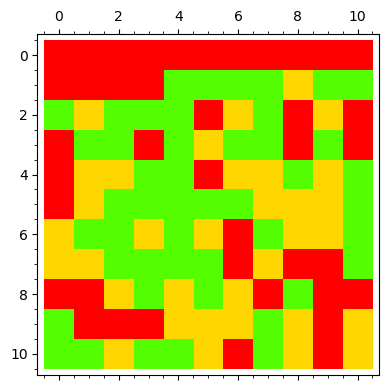

vertical asix mirror


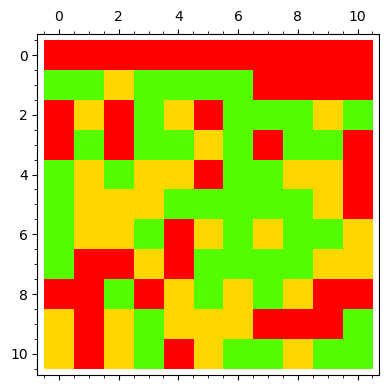


main_diagonal asix mirror


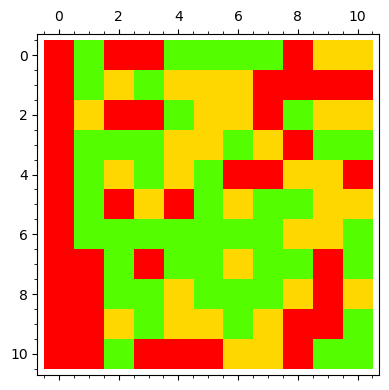


horizontal asix mirror


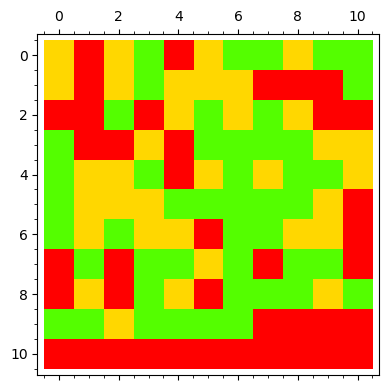


side_diagonal asix mirror


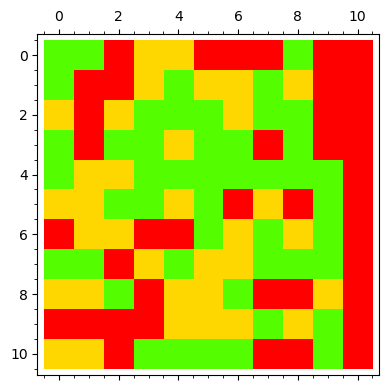


90 degree rotation


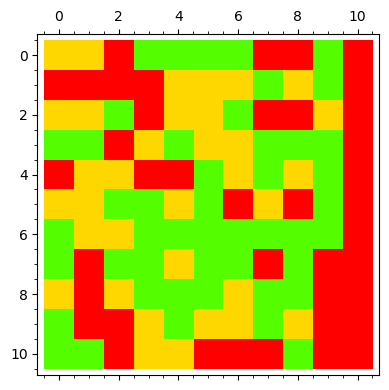


180 degree rotation


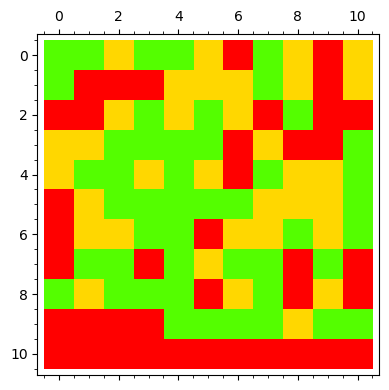


270 degree rotation


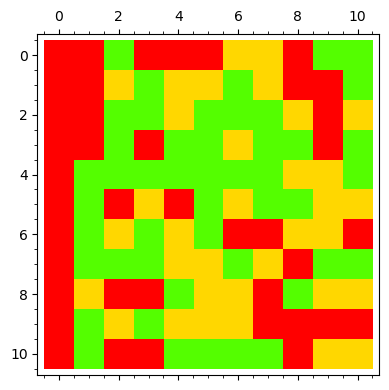


360 degree rotation


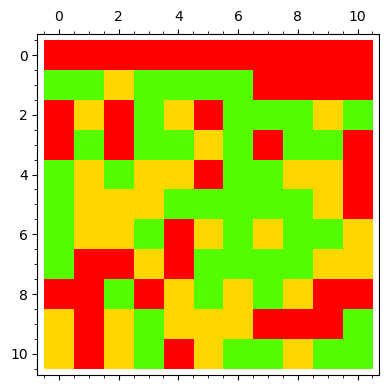

In [38]:
test(1)

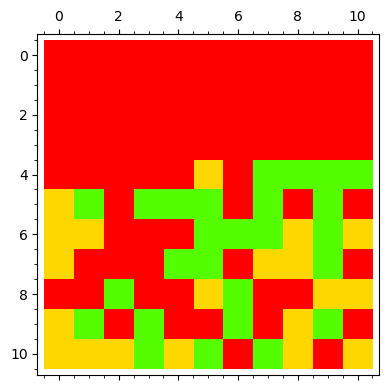

vertical asix mirror


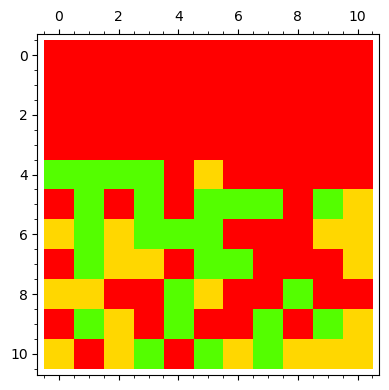


main_diagonal asix mirror


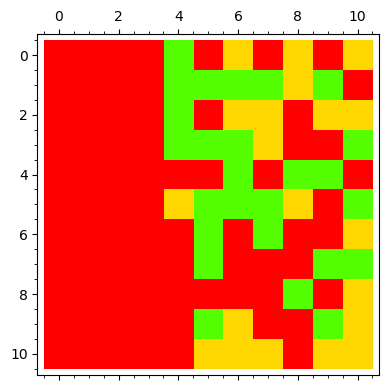


horizontal asix mirror


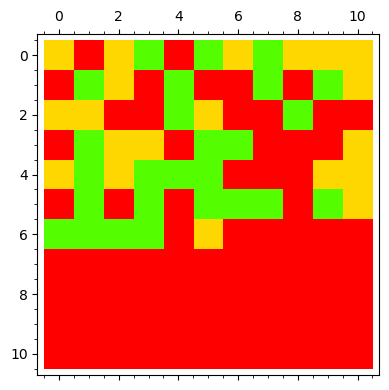


side_diagonal asix mirror


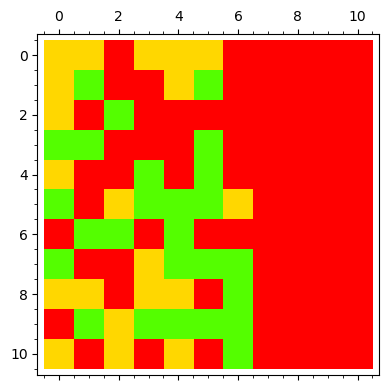


90 degree rotation


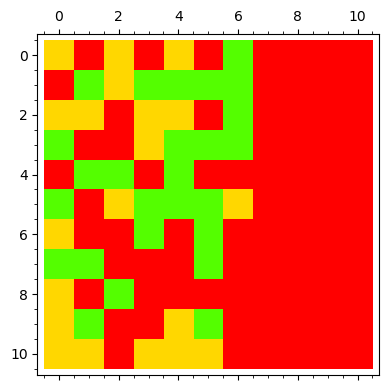


180 degree rotation


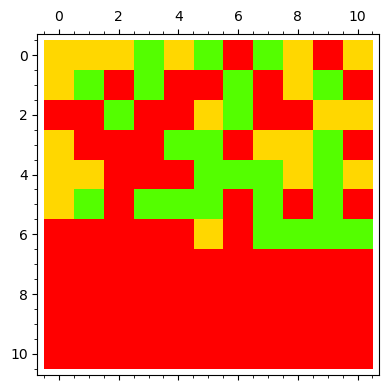


270 degree rotation


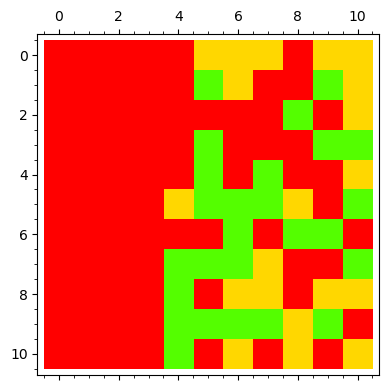


360 degree rotation


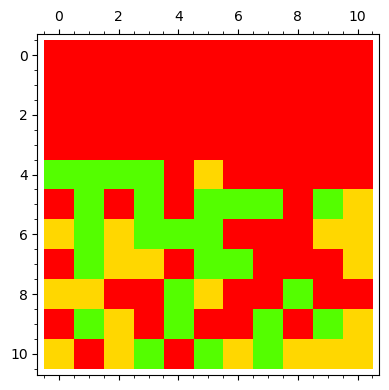

In [39]:
test(2)

**Выводы**<br>
Написаны функции для графического отображения раскраски по заданному номеру. Отображается как и изначальная раскраска, так и после воздействия вращений и отображений.

## Выводы
Было сформировано представление о задачах о раскрасках, на практике использована лемма Бёрнсайда для решения задачи о раскрасках, для реализации алгоритмов решения задачи использовалась система компьютерной алгебры SageMath.<br> 
Аналитически решена задача о раскраске мозаики, представляющей собой набор из клеточек, матрицу, которые могут быть окрашены в один из трёх цветов. При решении задачи было посчитано количество способов составления такой мозаики с точностью до поворотов и осевых симметрий. Все рассуждения в ходе решения были подкреплены визуальным отображением матриц. Также были реализованы функции графического отображения раскраски по заданному номеру с учетом различных воздействий на неё.